<p align="center"><b>Imports Required Libraries</b></p>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Union

<p align="center"><b>Data Generation Function</b></p>

In [33]:
def generate_sample_donations(filename: str = 'donations.txt', num_entries: int = 50) -> None:
    """
    Generate a sample donations file with random data
    
    Parameters:
    -----------
    filename : str, optional
        Output filename for donations
    num_entries : int, optional
        Number of donation entries to generate
    """
    # TODO: Implement random donation generation
    # Suggestions:
    # - Use numpy for random number generation
    np.random.seed(42)
    # - Create realistic donation amounts (e.g., $50-$1000)
    donations = np.clip(
       np.random.normal(250, 100, num_entries),
       50,
       1000 
    )
    # - Write to a text file
    try:
        with open(filename, 'w') as f:
            for donation in donations:
                f.write(f"{donation}\n")
        print(f"Generated {num_entries} donations in {filename}")
    except IOError as e:
        print(f"Error writing file: {e}")

<p align="center"><b>Data Reading and Validation</b></p>

In [34]:
def read_donations(filename: str) -> pd.Series:
    """
    Read donations from a text file
    
    Parameters:
    -----------
    filename : str
        Path to the donations file
    
    Returns:
    --------
    pd.Series
        Validated donation amounts
    """
    # TODO: Implement robust file reading
    # Requirements:
    # - Convert to numeric, handling potential non-numeric entries
    # - Handle potential file reading errors
    try:
        donations = pd.read_csv(
            filename,
            header=None,
            names=['amount'],
            dtype=float,
            on_bad_lines='skip' # Skips any bad or unreadable lines
        )['amount']
    
    # - Remove or handle outliers
    # - Removes extreme outliers (beyond three standard deviations)
        donations = donations[
            np.abs(donations - donations.mean()) <=
            (3 * donations.std())
        ]

        return donations
    
    except FileNotFoundError:
        print(f"File {filename} not found.")
        return pd.Series()
    except Exception as e:
        print(f"Error reading donations: {e}")
        return pd.Series

In [35]:
def calculate_statistics(donations: pd.Series) -> dict:
    """
    Calculate comprehensive statistics
    
    Parameters:
    -----------
    donations : pd.Series
        Donation amounts
    
    Returns:
    --------
    dict
        Comprehensive statistical summary
    """
# Ensure that the data was generated properly
    if donations.empty:
        print("No donation data available for statistical analysis")
        return {}

    return {
        'Mean': donations.mean(),
        'Median': donations.median(),
        'Mode': donations.mode().values[0],
        'Standard Deviation': donations.std(),
        'Minimum': donations.min(),
        'Maximum': donations.max(),
        'Total Donations': donations.sum()
    }

In [36]:
def create_donation_visualizations(donations: pd.Series) -> None:
    """
    Create multiple visualizations of donation data
    
    Parameters:
    -----------
    donations : pd.Series
        Donation amounts
    """
    if donations.empty:
        print("No donations avaiable for visualization")
        return
    
    plt.figure(figsize=(16,12))
    
    # Create a 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
 # Histogram with KDE
    plt.subplot(2, 2, 1)
    donations.plot(kind='hist', bins=20, density=True, alpha=0.7)
    donations.plot(kind='kde', color='red')
    plt.title('Donation Distribution')
    plt.xlabel('Donation Amount ($)')
    plt.ylabel('Density')
    
    # Box Plot
    plt.subplot(2, 2, 2)
    plt.boxplot(donations)
    plt.title('Donation Box Plot')
    
    # Violin Plot using seaborn
    import seaborn as sns
    plt.subplot(2, 2, 3)
    sns.violinplot(data=donations, inner="quartile")
    plt.title('Donation Violin Plot')
    
    # Cumulative Distribution
    plt.subplot(2, 2, 4)
    donations.sort_values().cumsum().plot()
    plt.title('Cumulative Donation Amount')
    plt.xlabel('Number of Donations')
    plt.ylabel('Total Donation Amount ($)')
    
    plt.tight_layout()
    plt.show()


Generated 50 donations in donations.txt

🔍 Donation Analytics Report 🔍
Mean: $227.45
Median: $226.59
Mode: $54.03
Standard Deviation: $93.37
Minimum: $54.03
Maximum: $435.23
Total Donations: $11,372.63


<Figure size 1600x1200 with 0 Axes>

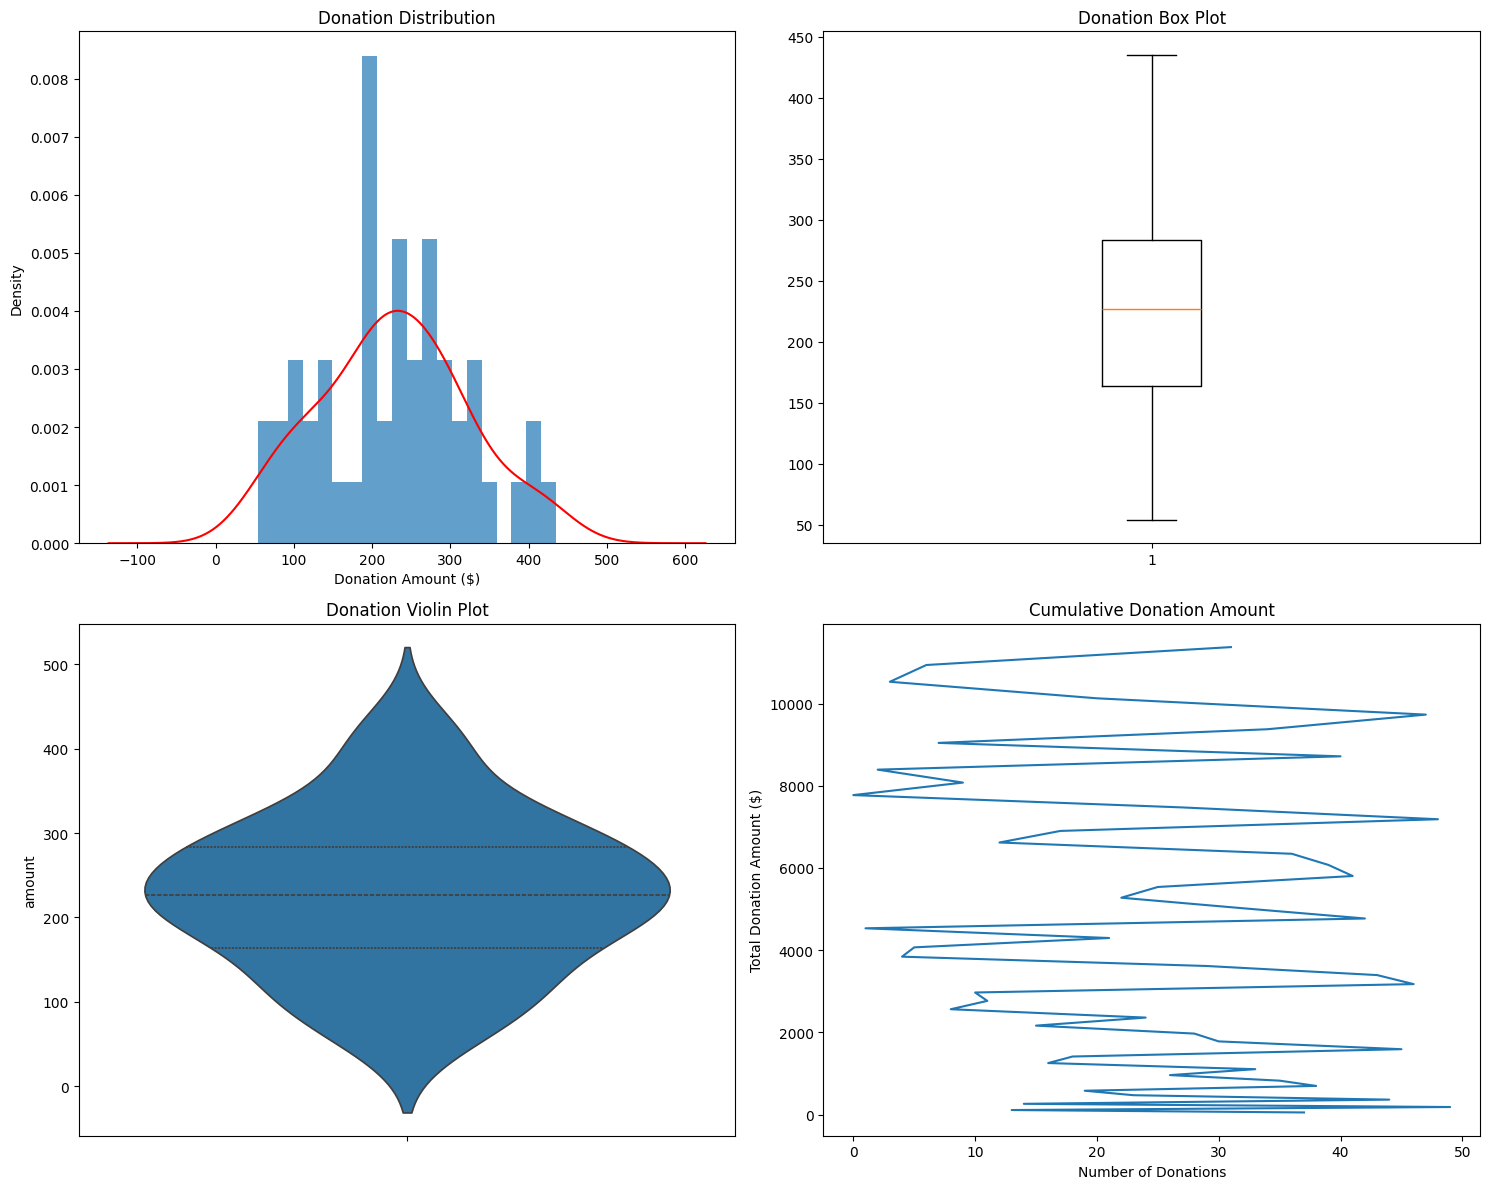

In [37]:
def main():
    try:
        # Data generation
        generate_sample_donations()
        
        # Data reading
        donations = read_donations('donations.txt')
        
        # Statistical analysis
        stats = calculate_statistics(donations)
        
        # Print statistics
        if stats:
            print("\n🔍 Donation Analytics Report 🔍")
            for stat, value in stats.items():
                print(f"{stat}: ${value:,.2f}")
        
        # Visualize data
        create_donation_visualizations(donations)
    
    except Exception as e:
        print(f"Analysis failed: {e}")

# Execution
if __name__ == '__main__':
    main()